In [3]:
# Question 5: Construct a Deep Neural Network for Classification with TensorFlow
# Description: Build a deep neural network using TensorFlow to classify the Fashion MNIST dataset.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-05-22 04:47:23.396743: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


830/844 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7583 - loss: 0.6787

2025-05-22 04:47:27.218707: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18816000 exceeds 10% of free system memory.


844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7593 - loss: 0.6757 - val_accuracy: 0.8408 - val_loss: 0.4232
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8611 - loss: 0.3795 - val_accuracy: 0.8660 - val_loss: 0.3638
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8761 - loss: 0.3325 - val_accuracy: 0.8772 - val_loss: 0.3490
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8863 - loss: 0.3089 - val_accuracy: 0.8755 - val_loss: 0.3354
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8943 - loss: 0.2861 - val_accuracy: 0.8807 - val_loss: 0.3337
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8983 - loss: 0.2737 - val_accuracy: 0.8852 - val_loss: 0.3192
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9031 - loss: 0.2588 - val_accuracy: 0.8827 - val_loss: 0.3289
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9075 - loss: 0.2464 - val_accuracy: 0.8812 - val_

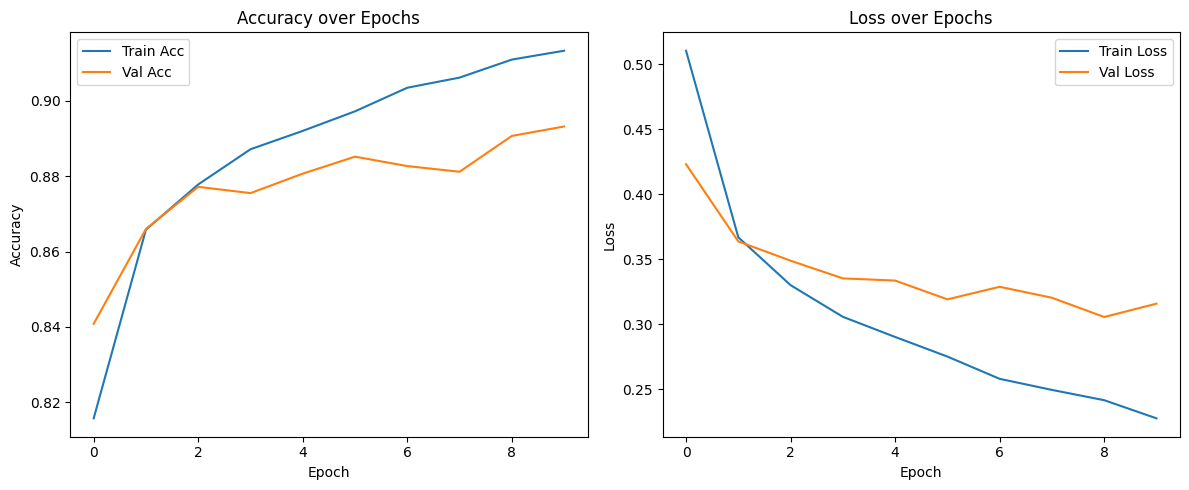

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 2. Normalize the data (pixel values from 0-255 to 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 3. Flatten the 28x28 images into vectors of size 784
X_train_flat = X_train.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)

# 4. Build the Deep Neural Network model
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for classification
])

# 5. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model architecture
model.summary()

# 6. Train the model
history = model.fit(X_train_flat, y_train, epochs=10, batch_size=64, validation_split=0.1)

# 7. Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_flat, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# 8. Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
